In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
import warnings
import plotly.express as px
from sklearn import preprocessing

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shell-datathon-coderspace/sample_submission.csv
/kaggle/input/shell-datathon-coderspace/train.csv
/kaggle/input/shell-datathon-coderspace/test.csv
/kaggle/input/shell-datathon-coderspace/price.csv


# Exploratory Data Analysis
# Veri Keşfi

In [104]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics as stats

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
import warnings
import plotly.express as px
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [105]:
price = pd.read_csv("/kaggle/input/shell-datathon-coderspace/price.csv")
sample_submission = pd.read_csv("/kaggle/input/shell-datathon-coderspace/sample_submission.csv")
test = pd.read_csv("/kaggle/input/shell-datathon-coderspace/test.csv")
train = pd.read_csv("/kaggle/input/shell-datathon-coderspace/train.csv")

In [106]:
temp = train.head(10)
temp.style.background_gradient(cmap="Oranges")

,Customer,Area,City Code,Billing Date,Product,Plant,Litres
0,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T102,0.000000
1,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T155,0.000000
2,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T102,0.000000
3,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T155,0.000000
4,10048261,Karadeniz Bölgesi,883,2014-01-02,Motorin,T155,16685.000000
5,10048261,Karadeniz Bölgesi,883,2014-01-03,Benzin,T155,5040.000000
6,10048261,Karadeniz Bölgesi,883,2014-01-03,Motorin,T155,12027.000000
7,10048261,Karadeniz Bölgesi,883,2014-01-08,Benzin,T155,4242.000000
8,10048261,Karadeniz Bölgesi,883,2014-01-08,Motorin,T155,12572.000000
9,10048261,Karadeniz Bölgesi,883,2014-01-10,Motorin,T155,16445.000000


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379260 entries, 0 to 1379259
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Customer      1379260 non-null  int64  
 1   Area          1379260 non-null  object 
 2   City Code     1379260 non-null  int64  
 3   Billing Date  1379260 non-null  object 
 4   Product       1379260 non-null  object 
 5   Plant         1379260 non-null  object 
 6   Litres        1379260 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.7+ MB


In [108]:
print(f'train verilerindeki satır sayısı: {train.shape[0]}')
print(f'train verilerindeki sütun sayısı: {train.shape[1]}')
print(f'train verilerindeki değer sayısı: {train.count().sum()}')
print(f'train verilerindeki eksik değerlerin sayısı: {sum(train.isna().sum())}')
train.head()

train verilerindeki satır sayısı: 1379260
train verilerindeki sütun sayısı: 7
train verilerindeki değer sayısı: 9654820
train verilerindeki eksik değerlerin sayısı: 0


,Customer,Area,City Code,Billing Date,Product,Plant,Litres
0,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T102,0.00
1,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T155,0.00
2,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T102,0.00
3,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T155,0.00
4,10048261,Karadeniz Bölgesi,883,2014-01-02,Motorin,T155,16685.00



 mu = 14055.20 and sigma = 10937.35



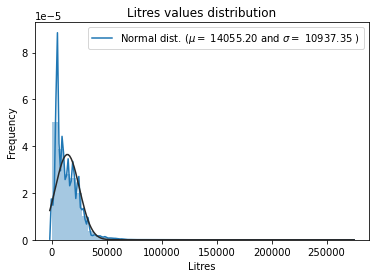

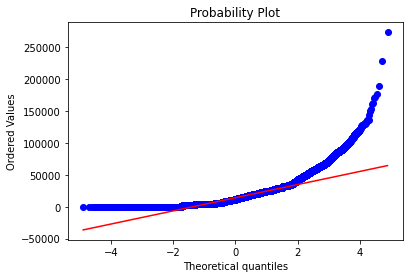

In [109]:
sns.distplot(train['Litres'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Litres'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Litres values distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Litres'], plot=plt)
plt.show()

In [110]:
train_daily_total_bill = pd.DataFrame(train.groupby(["Billing Date"])["Litres"].agg([np.sum]))
fig = px.line(train_daily_total_bill, x=train_daily_total_bill.index, y="sum")
fig.show()

In [111]:
train["Billing Date"] = pd.to_datetime(train["Billing Date"])
train["Year"] = train["Billing Date"].dt.year
train["Month"] = train["Billing Date"].dt.month
train["Week"] = train["Billing Date"].dt.week

In [112]:
table_2 = train.groupby(["Year"])["Litres"].agg([np.mean, np.sum, np.max, np.min, np.size])
pd.DataFrame(table_2).style.background_gradient(cmap = "winter")

,mean,sum,amax,amin,size
Year,,,,,
2014,13106.840231,3400989116.912000,171670.000000,0.000000,259482
2015,13682.856440,3701144252.671000,136448.000000,0.000000,270495
2016,14411.519986,3973803698.000000,273221.000000,0.000000,275738
2017,14407.647482,4077839689.691000,188347.000000,0.000000,283033
2018,14567.387342,4232000831.563000,176943.000000,0.000000,290512


In [113]:
fig = px.bar(pd.DataFrame(table_2), x=pd.DataFrame(table_2).index, y='sum',
            color_discrete_sequence =['blue']*len(table_2),
             title="Yıla göre gruplandırma Toplam Litre değerleri")
fig.show()

In [114]:
table_3 = train.groupby(["Area"])["Litres"].agg([np.mean, np.sum, np.max, np.min, np.size])
pd.DataFrame(table_3).style.background_gradient(cmap = "Paired")

,mean,sum,amax,amin,size
Area,,,,,
Akdeniz Bölgesi,11639.074745,1997241948.125000,122976.000000,0.000000,171598
Doğu Anadolu Bölgesi,13720.433505,408608230.210000,152575.000000,0.000000,29781
Ege Bölgesi,13120.319134,2953803687.265000,129410.000000,0.000000,225132
Güneydoğu Anadolu Bölgesi,14149.624302,771932753.778000,273221.000000,0.000000,54555
Karadeniz Bölgesi,12799.962220,1280009021.937000,188347.000000,0.000000,100001
Marmara Bölgesi,15299.319045,8964865484.031000,136448.000000,0.000000,585965
İç Anadolu Bölgesi,14179.639178,3009316463.491000,171670.000000,0.000000,212228


In [115]:
fig = px.bar(pd.DataFrame(table_3), x=pd.DataFrame(table_3).index, y='sum',
            color_discrete_sequence =['red']*len(table_3),
             title="Alana göre gruplandırma Toplam Litre değerleri")
fig.show()

In [116]:
label_encoder = preprocessing.LabelEncoder()
train['City Code']= label_encoder.fit_transform(train['City Code'])
  
table_4 = train.groupby(["City Code"])["Litres"].agg([np.mean, np.sum, np.max, np.min, np.size])
pd.DataFrame(table_4).style.background_gradient(cmap = "Paired")

,mean,sum,amax,amin,size
City Code,,,,,
0,13044.686904,15040524.000000,44722.000000,0.000000,1153
1,12707.355288,127251455.855000,72195.000000,0.000000,10014
2,12224.624597,372557659.222000,73514.000000,0.000000,30476
3,14542.634557,19021766.000000,273221.000000,0.000000,1308
4,14524.104918,190948407.363000,227877.000000,0.000000,13147
5,13112.935613,35758975.418000,49682.000000,0.000000,2727
6,13543.296647,34332257.000000,55366.000000,0.000000,2535
7,20937.360739,50982473.400000,152575.000000,0.000000,2435
8,14788.201826,21605562.868000,53040.000000,0.000000,1461


In [117]:
fig = px.bar(pd.DataFrame(table_4), x=pd.DataFrame(table_4).index, y='sum',
             color_discrete_sequence =['green']*len(table_4),
             title="Şehre göre gruplandırılan Toplam Litre değerleri")
fig.show()

In [118]:
table_5 = train.groupby(["Product"])["Litres"].agg([np.mean, np.sum, np.max, np.min, np.size])
pd.DataFrame(table_5).style.background_gradient(cmap = "Paired")

,mean,sum,amax,amin,size
Product,,,,,
Benzin,6605.705182,3569188018.484000,126648.000000,0.000000,540319
Motorin,18853.041597,15816589570.353001,273221.000000,0.000000,838941


In [119]:
fig = px.bar(pd.DataFrame(table_5), x=pd.DataFrame(table_5).index, y='sum',
             color_discrete_sequence =['black']*len(table_5),
             title="Ürün Cinsine Göre Gruplandırılan Toplam Litre Değerleri")
fig.show()

In [120]:
s=pd.read_csv("/kaggle/input/shell-datathon-coderspace/sample_submission.csv")

In [121]:
s = s.select_dtypes(include = ['float64', 'int64'])

In [122]:
!pip install ycimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics as stats
import calendar
from datetime import datetime as dt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [123]:
from ycimpute.imputer import knnimput

In [124]:
var_names = list(s)

In [125]:
import numpy as np
n_df = np.array(s)

In [126]:
n_df[0:10]

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [3., 0.],
       [4., 0.],
       [5., 0.],
       [6., 0.],
       [7., 0.],
       [8., 0.],
       [9., 0.]])

In [127]:
# read price, train and test data
trainData = pd.read_csv("/kaggle/input/shell-datathon-coderspace/train.csv")
testData = pd.read_csv("/kaggle/input/shell-datathon-coderspace/test.csv")
priceData = pd.read_csv("/kaggle/input/shell-datathon-coderspace/price.csv")

index = testData["index"]
                      
testData.drop("index", axis= 1, inplace=True)

priceData.rename(columns={"Validfrom": "Date", "City Code": "CityCode"}, inplace=True)
trainData.rename(columns={"Billing Date": "Date", "City Code": "CityCode"}, inplace=True)
testData.rename(columns={"Week Start Date": "Date", "City Code": "CityCode"}, inplace=True)

# concat train and test data
data = pd.concat([trainData, testData], sort=True).reset_index(drop=True)

print(f'Number of Training Examples = {trainData.shape[0]}')
print(f'Number of Test Examples = {testData.shape[0]}')
print(f'Data Shape = {data.shape}')

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:1379259], all_data.loc[1379260:]

Number of Training Examples = 1379260
Number of Test Examples = 108472
Data Shape = (1487732, 7)


In [128]:
data = pd.merge(data, priceData[["CityCode", "Date", "Product", "CRP"]],
                on=["CityCode", "Date", "Product"], how="left")

# change the dtype as object 
data['CityCode'] = data['CityCode'].astype('object')
data['Customer'] = data['Customer'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Area      1487732 non-null  object 
 1   CityCode  1487732 non-null  object 
 2   Customer  1487732 non-null  object 
 3   Date      1487732 non-null  object 
 4   Litres    1379260 non-null  float64
 5   Plant     1379260 non-null  object 
 6   Product   1487732 non-null  object 
 7   CRP       1467957 non-null  float64
dtypes: float64(2), object(6)
memory usage: 102.2+ MB


In [129]:
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

# convert the 'Date' column to datetime format
data['Date']= pd.to_datetime(data['Date'])

# create Year, Month, Day, DayNames columns
data['Year'] = data["Date"].dt.year
data['Month'] = data["Date"].dt.month
data['Day'] = data["Date"].dt.day
data['DayNames'] = data['Date'].apply(lambda x: findDay(x))
data.head()

,Area,CityCode,Customer,Date,Litres,Plant,Product,CRP,Year,Month,Day,DayNames
0,Karadeniz Bölgesi,883,10048261,2014-01-01,0.00,T102,Benzin,4.98,2014,1,1,Wednesday
1,Karadeniz Bölgesi,883,10048261,2014-01-01,0.00,T155,Benzin,4.98,2014,1,1,Wednesday
2,Karadeniz Bölgesi,883,10048261,2014-01-01,0.00,T102,Motorin,4.58,2014,1,1,Wednesday
3,Karadeniz Bölgesi,883,10048261,2014-01-01,0.00,T155,Motorin,4.58,2014,1,1,Wednesday
4,Karadeniz Bölgesi,883,10048261,2014-01-02,16685.00,T155,Motorin,4.65,2014,1,2,Thursday


In [130]:
# filling the missing values in CRP with the mean of Year, Month and Product groups
data['CRP'] = data.groupby(['Year', 'Month', 'Product'])['CRP'].apply(lambda x: x.fillna(x.mean()))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Area      1487732 non-null  object        
 1   CityCode  1487732 non-null  object        
 2   Customer  1487732 non-null  object        
 3   Date      1487732 non-null  datetime64[ns]
 4   Litres    1379260 non-null  float64       
 5   Plant     1379260 non-null  object        
 6   Product   1487732 non-null  object        
 7   CRP       1487732 non-null  float64       
 8   Year      1487732 non-null  int64         
 9   Month     1487732 non-null  int64         
 10  Day       1487732 non-null  int64         
 11  DayNames  1487732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 147.6+ MB


In [131]:
# filling the missing values in plant with the mode of Area and CityCode
def fill_missing_values(x):
    return x.fillna(stats.mode(x))

data['Plant'] = data.groupby(['Area', 'CityCode'])['Plant'].apply(fill_missing_values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Area      1487732 non-null  object        
 1   CityCode  1487732 non-null  object        
 2   Customer  1487732 non-null  object        
 3   Date      1487732 non-null  datetime64[ns]
 4   Litres    1379260 non-null  float64       
 5   Plant     1487628 non-null  object        
 6   Product   1487732 non-null  object        
 7   CRP       1487732 non-null  float64       
 8   Year      1487732 non-null  int64         
 9   Month     1487732 non-null  int64         
 10  Day       1487732 non-null  int64         
 11  DayNames  1487732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 147.6+ MB


In [132]:
# still there are some missing values
# filling the missing values in Plant with the mode of Area and Product
data['Plant'] = data.groupby(['Area', 'Product'])['Plant'].apply(fill_missing_values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Area      1487732 non-null  object        
 1   CityCode  1487732 non-null  object        
 2   Customer  1487732 non-null  object        
 3   Date      1487732 non-null  datetime64[ns]
 4   Litres    1379260 non-null  float64       
 5   Plant     1487732 non-null  object        
 6   Product   1487732 non-null  object        
 7   CRP       1487732 non-null  float64       
 8   Year      1487732 non-null  int64         
 9   Month     1487732 non-null  int64         
 10  Day       1487732 non-null  int64         
 11  DayNames  1487732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 147.6+ MB


In [133]:
data[["Area", "CityCode", "Customer", "Plant", "Product", "DayNames"]].describe()


,Area,CityCode,Customer,Plant,Product,DayNames
count,1487732,1487732,1487732,1487732,1487732,1487732
unique,7,76,1275,17,2,7
top,Marmara Bölgesi,835,10049419,T314,Motorin,Monday
freq,622365,357229,3828,271733,893177,340038


In [134]:
region = {'Region': ['Karadeniz Bölgesi', 'Ege Bölgesi', 'Marmara Bölgesi', 'Akdeniz Bölgesi', 'İç Anadolu Bölgesi', 'Doğu Anadolu Bölgesi', 'Güneydoğu Anadolu Bölgesi'],
          '2014': [7597894, 10023549, 23608079, 9907771, 12381363, 5927630, 8250718],
          '2015': [7624463, 10138132, 24066036, 10039939, 12545317, 5941626, 8385540],
          '2016': [7773491, 10265111, 24415423, 10182776, 12732393, 5938790, 8508887],
          '2017': [7782736, 10383963, 24816023, 10303984, 12895998, 5962666, 8665165],
          '2018': [7973211, 10514200, 25034570, 10461409, 13114013, 6058499, 8847980],
          '2019': [7953676, 10618433, 25650403, 10627530, 13283751, 6045586, 8975618]}

region = pd.DataFrame(region)
region

,Region,2014,2015,2016,2017,2018,2019
0,Karadeniz Bölgesi,7597894,7624463,7773491,7782736,7973211,7953676
1,Ege Bölgesi,10023549,10138132,10265111,10383963,10514200,10618433
2,Marmara Bölgesi,23608079,24066036,24415423,24816023,25034570,25650403
3,Akdeniz Bölgesi,9907771,10039939,10182776,10303984,10461409,10627530
4,İç Anadolu Bölgesi,12381363,12545317,12732393,12895998,13114013,13283751
5,Doğu Anadolu Bölgesi,5927630,5941626,5938790,5962666,6058499,6045586
6,Güneydoğu Anadolu Bölgesi,8250718,8385540,8508887,8665165,8847980,8975618


In [135]:
population = []
for col1, col2 in zip(data['Area'], data['Year']):
    population.append(region[region["Region"] == f"{col1}"][f"{col2}"])

data["Population"] = population

# change the dtype as int64
data["Population"] = data["Population"].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Area        1487732 non-null  object        
 1   CityCode    1487732 non-null  object        
 2   Customer    1487732 non-null  object        
 3   Date        1487732 non-null  datetime64[ns]
 4   Litres      1379260 non-null  float64       
 5   Plant       1487732 non-null  object        
 6   Product     1487732 non-null  object        
 7   CRP         1487732 non-null  float64       
 8   Year        1487732 non-null  int64         
 9   Month       1487732 non-null  int64         
 10  Day         1487732 non-null  int64         
 11  DayNames    1487732 non-null  object        
 12  Population  1487732 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 158.9+ MB


In [136]:
df = pd.DataFrame({'Year': [2014, 2015, 2016, 2017, 2018, 2019],
                   'Benzin': [5788505, 5977352, 6142806, 6321508, 6390297, 6427550],
                   'Motorin': [8782462, 9576896, 10337907, 11102943, 11592878, 11865482]})

df

,Year,Benzin,Motorin
0,2014,5788505,8782462
1,2015,5977352,9576896
2,2016,6142806,10337907
3,2017,6321508,11102943
4,2018,6390297,11592878
5,2019,6427550,11865482


In [137]:
VehiclesNumber = []
for col1, col2 in zip(data['Year'], data['Product']):
    if col1 == 2014 and col2 == "Benzin":
        VehiclesNumber.append(5788505)
    elif col1 == 2014 and col2 == "Motorin":
        VehiclesNumber.append(8782462)
    elif col1 == 2015 and col2 == "Benzin":
        VehiclesNumber.append(5977352)
    elif col1 == 2015 and col2 == "Motorin":
        VehiclesNumber.append(9576896)
    elif col1 == 2016 and col2 == "Benzin":
        VehiclesNumber.append(6142806)
    elif col1 == 2016 and col2 == "Motorin":
        VehiclesNumber.append(10337907)  
    elif col1 == 2017 and col2 == "Benzin":
        VehiclesNumber.append(6321508)
    elif col1 == 2017 and col2 == "Motorin":
        VehiclesNumber.append(11102943)
    elif col1 == 2018 and col2 == "Benzin":
        VehiclesNumber.append(6390297)
    elif col1 == 2018 and col2 == "Motorin":
        VehiclesNumber.append(11592878) 
    elif col1 == 2019 and col2 == "Benzin":
        VehiclesNumber.append(6427550)
    elif col1 == 2019 and col2 == "Motorin":
        VehiclesNumber.append(11865482)

        
# for col1, col2 in zip(data['Year'], data['Product']):
    # VehiclesNumber.append(df[df["Year"] == col1][f"{col2}"])
    

data["VehiclesNumber"] = VehiclesNumber
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Area            1487732 non-null  object        
 1   CityCode        1487732 non-null  object        
 2   Customer        1487732 non-null  object        
 3   Date            1487732 non-null  datetime64[ns]
 4   Litres          1379260 non-null  float64       
 5   Plant           1487732 non-null  object        
 6   Product         1487732 non-null  object        
 7   CRP             1487732 non-null  float64       
 8   Year            1487732 non-null  int64         
 9   Month           1487732 non-null  int64         
 10  Day             1487732 non-null  int64         
 11  DayNames        1487732 non-null  object        
 12  Population      1487732 non-null  int64         
 13  VehiclesNumber  1487732 non-null  int64         
dtypes: datetime64[ns](

In [138]:
MinWage = []
for i in data["Year"]:
    if i == 2014:
        MinWage.append(891)
    elif i == 2015:
        MinWage.append(1000.54)
    elif i == 2016:
        MinWage.append(1300.99)
    elif i == 2017:
        MinWage.append(1404)
    elif i == 2018:
        MinWage.append(1603)
    elif i == 2019:
        MinWage.append(2020.59)
        
data["MinumumWage"] = MinWage
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Area            1487732 non-null  object        
 1   CityCode        1487732 non-null  object        
 2   Customer        1487732 non-null  object        
 3   Date            1487732 non-null  datetime64[ns]
 4   Litres          1379260 non-null  float64       
 5   Plant           1487732 non-null  object        
 6   Product         1487732 non-null  object        
 7   CRP             1487732 non-null  float64       
 8   Year            1487732 non-null  int64         
 9   Month           1487732 non-null  int64         
 10  Day             1487732 non-null  int64         
 11  DayNames        1487732 non-null  object        
 12  Population      1487732 non-null  int64         
 13  VehiclesNumber  1487732 non-null  int64         
 14  MinumumWage     14

In [139]:
# How much fuel can be purchased with minumum wage
data["FuelAmount"] = data["MinumumWage"] / data["CRP"]
data["FuelAmount"] = np.round(data["FuelAmount"], 2)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Area            1487732 non-null  object        
 1   CityCode        1487732 non-null  object        
 2   Customer        1487732 non-null  object        
 3   Date            1487732 non-null  datetime64[ns]
 4   Litres          1379260 non-null  float64       
 5   Plant           1487732 non-null  object        
 6   Product         1487732 non-null  object        
 7   CRP             1487732 non-null  float64       
 8   Year            1487732 non-null  int64         
 9   Month           1487732 non-null  int64         
 10  Day             1487732 non-null  int64         
 11  DayNames        1487732 non-null  object        
 12  Population      1487732 non-null  int64         
 13  VehiclesNumber  1487732 non-null  int64         
 14  MinumumWage     14

In [140]:
# create TaxAmount and TaxRates column
data["TaxAmount"] = None
data["TaxRates"] = None

In [141]:
data.loc[(data["Year"] == 2014) & (data["Product"] == "Benzin"), "TaxAmount"] = 2.1765
data.loc[(data["Year"] == 2014) & (data["Product"] == "Motorin"), "TaxAmount"] = 1.5945

# 2015
data.loc[(data["Year"] == 2015) & (data["Product"] == "Benzin"), "TaxAmount"] = 2.1765
data.loc[(data["Year"] == 2015) & (data["Product"] == "Motorin"), "TaxAmount"] = 1.5945

In [142]:
data.loc[(data["Year"] == 2016) & (data["Product"] == "Benzin"), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2016) & (data["Product"] == "Motorin"), "TaxAmount"] = 1.7945

# 2017
data.loc[(data["Year"] == 2017) & (data["Product"] == "Benzin"), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2017) & (data["Product"] == "Motorin"), "TaxAmount"] = 1.7945

In [143]:
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([1, 2, 3, 4])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([1, 2, 3, 4])), "TaxAmount"] = 1.7945
# Month 5
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([5])), "TaxAmount"] = 2.0832
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([5])), "TaxAmount"] = 1.5275
# Month 6
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([6])), "TaxAmount"] = 2.1842
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([6])), "TaxAmount"] = 1.6210
# Month 7
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([7])), "TaxAmount"] = 2.1748
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([7])), "TaxAmount"] = 1.6210
# Month 8
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([8])), "TaxAmount"] = 1.85
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([8])), "TaxAmount"] = 1.3082
# Month 9
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([9])), "TaxAmount"] = 1.6533
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([9])), "TaxAmount"] = 0.9205
# Month 10
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([10])), "TaxAmount"] = 1.9090
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([10])), "TaxAmount"] = 1.0262
# Month 11
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([11])), "TaxAmount"] = 2.3716
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([11])), "TaxAmount"] =1.5268
# Month 12
data.loc[(data["Year"] == 2018) & (data["Product"] == "Benzin") & (data["Month"].isin([12])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2018) & (data["Product"] == "Motorin") & (data["Month"].isin([12])), "TaxAmount"] = 1.7945

In [144]:
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([1, 2, 3])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([1, 2, 3])), "TaxAmount"] = 1.7945
# Month 4
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([1, 2, 3])), "TaxAmount"] = 2.1554
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([1, 2, 3])), "TaxAmount"] = 1.6186
# Month 5
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([5])), "TaxAmount"] = 2.0810
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([5])), "TaxAmount"] = 1.3913
# Month 6
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([6])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([6])), "TaxAmount"] = 1.7945
# Month 7
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([7])), "TaxAmount"] = 2.33
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([7])), "TaxAmount"] = 1.78
# Month 8
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([8])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([8])), "TaxAmount"] = 1.7945
# Month 9
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([9])), "TaxAmount"] = 2.36
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([9])), "TaxAmount"] = 1.65
# Month 10
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([10])), "TaxAmount"] = 2.36
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([10])), "TaxAmount"] = 1.79
# Month 11
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([11])), "TaxAmount"] = 2.3716
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([11])), "TaxAmount"] = 1.7829
# Month 12
data.loc[(data["Year"] == 2019) & (data["Product"] == "Benzin") & (data["Month"].isin([12])), "TaxAmount"] = 2.3765
data.loc[(data["Year"] == 2019) & (data["Product"] == "Motorin") & (data["Month"].isin([12])), "TaxAmount"] = 1.60
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Area            1487732 non-null  object        
 1   CityCode        1487732 non-null  object        
 2   Customer        1487732 non-null  object        
 3   Date            1487732 non-null  datetime64[ns]
 4   Litres          1379260 non-null  float64       
 5   Plant           1487732 non-null  object        
 6   Product         1487732 non-null  object        
 7   CRP             1487732 non-null  float64       
 8   Year            1487732 non-null  int64         
 9   Month           1487732 non-null  int64         
 10  Day             1487732 non-null  int64         
 11  DayNames        1487732 non-null  object        
 12  Population      1487732 non-null  int64         
 13  VehiclesNumber  1487732 non-null  int64         
 14  MinumumWage     14

In [145]:
data['TaxAmount'] = data.groupby(['Year', 'Product'])['TaxAmount'].apply(lambda x: x.fillna(x.mean()))

# change the dtype as int64
data["TaxAmount"] = data["TaxAmount"].astype('float64')

In [146]:
data["TaxRates"] = np.round(((data["TaxAmount"] / data["CRP"]) * 100), 3)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Area            1487732 non-null  object        
 1   CityCode        1487732 non-null  object        
 2   Customer        1487732 non-null  object        
 3   Date            1487732 non-null  datetime64[ns]
 4   Litres          1379260 non-null  float64       
 5   Plant           1487732 non-null  object        
 6   Product         1487732 non-null  object        
 7   CRP             1487732 non-null  float64       
 8   Year            1487732 non-null  int64         
 9   Month           1487732 non-null  int64         
 10  Day             1487732 non-null  int64         
 11  DayNames        1487732 non-null  object        
 12  Population      1487732 non-null  int64         
 13  VehiclesNumber  1487732 non-null  int64         
 14  MinumumWage     14

In [147]:
FuelConsumption = []
FuelConsumptionRate = []

for i in data["Year"]:
    if i == 2014:
        FuelConsumption.append(21892670)
        FuelConsumptionRate.append(3.62)
    elif i == 2015:
        FuelConsumption.append(24824703)
        FuelConsumptionRate.append(13.39)
    elif i == 2016:
        FuelConsumption.append(26717671)
        FuelConsumptionRate.append(7.63)    
    elif i == 2017:
        FuelConsumption.append(28460979)
        FuelConsumptionRate.append(6.52)
    elif i == 2018:
        FuelConsumption.append(27807223)
        FuelConsumptionRate.append(-2.30)
    elif i == 2019:
        FuelConsumption.append(26737750)
        FuelConsumptionRate.append(-3.85)
        
data["FuelConsumption"] = FuelConsumption
data["FuelConsumptionRate"] = FuelConsumptionRate
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Area                 1487732 non-null  object        
 1   CityCode             1487732 non-null  object        
 2   Customer             1487732 non-null  object        
 3   Date                 1487732 non-null  datetime64[ns]
 4   Litres               1379260 non-null  float64       
 5   Plant                1487732 non-null  object        
 6   Product              1487732 non-null  object        
 7   CRP                  1487732 non-null  float64       
 8   Year                 1487732 non-null  int64         
 9   Month                1487732 non-null  int64         
 10  Day                  1487732 non-null  int64         
 11  DayNames             1487732 non-null  object        
 12  Population           1487732 non-null  int64         
 1

In [148]:
season = []
for i in data["Month"]:
    if i == 1 or i == 2 or i == 12:
        season.append("Winter")
    elif i == 3 or i == 4 or i == 5:
        season.append("Spring")
    elif i == 6 or i == 7 or i == 8:
        season.append("Summer")
    elif i == 9 or i == 10 or i == 11:
        season.append("Fall")
data["Season"] = season
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Area                 1487732 non-null  object        
 1   CityCode             1487732 non-null  object        
 2   Customer             1487732 non-null  object        
 3   Date                 1487732 non-null  datetime64[ns]
 4   Litres               1379260 non-null  float64       
 5   Plant                1487732 non-null  object        
 6   Product              1487732 non-null  object        
 7   CRP                  1487732 non-null  float64       
 8   Year                 1487732 non-null  int64         
 9   Month                1487732 non-null  int64         
 10  Day                  1487732 non-null  int64         
 11  DayNames             1487732 non-null  object        
 12  Population           1487732 non-null  int64         
 1

In [149]:
data.drop(["Date", "Year", "Day", "Month"], axis=1).describe()

,Litres,CRP,Population,VehiclesNumber,MinumumWage,FuelAmount,TaxAmount,TaxRates,FuelConsumption,FuelConsumptionRate
count,1379260.00,1487732.00,1487732.00,1487732.00,1487732.00,1487732.00,1487732.00,1487732.00,1487732.00,1487732.00
mean,14055.20,4.89,16249569.45,8709523.68,1305.89,268.03,1.90,39.94,26077824.81,4.99
std,10937.35,0.93,7128832.44,2236469.39,321.39,47.43,0.33,8.37,2261107.65,5.56
min,0.00,3.22,5927630.00,5788505.00,891.00,169.71,0.92,14.10,21892670.00,-3.85
25%,5034.00,4.27,10182776.00,6321508.00,1000.54,233.23,1.59,35.04,24824703.00,-2.30
50%,11459.00,4.66,12732393.00,8782462.00,1300.99,269.69,1.79,40.68,26717671.00,6.52
75%,20050.00,5.45,24415423.00,11102943.00,1603.00,301.94,2.18,45.70,27807223.00,7.63
max,273221.00,7.38,25650403.00,11865482.00,2020.59,404.03,2.38,59.26,28460979.00,13.39


In [150]:
data[["Area", "CityCode", "Customer", "Plant", "Product", "DayNames", "Season"]].describe()


,Area,CityCode,Customer,Plant,Product,DayNames,Season
count,1487732,1487732,1487732,1487732,1487732,1487732,1487732
unique,7,76,1275,17,2,7,4
top,Marmara Bölgesi,835,10049419,T314,Motorin,Monday,Summer
freq,622365,357229,3828,271733,893177,340038,413796


In [151]:
visualize = data.copy()
df, df2 = divide_df(visualize)
dataVis = df.loc[(df["Litres"] > 0)]

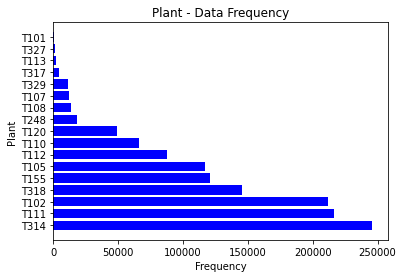

Number of Samples According to Plant 
T314    245875
T111    216375
T102    211762
T318    145495
T155    120736
T105    117305
T112     87503
T110     65959
T120     49434
T248     18164
T108     13513
T107     11883
T329     11211
T317      4610
T113      2279
T327      1263
T101       144
Name: Plant, dtype: int64


In [152]:
plt.figure()
plt.barh(dataVis["Plant"].value_counts().index, dataVis["Plant"].value_counts(), color = "b")
#plt.xticks(dataVis["Plant"].values)
plt.xlabel("Frequency")
plt.ylabel("Plant")
plt.title("Plant - Data Frequency")
plt.show()
print(f"Number of Samples According to Plant \n{dataVis['Plant'].value_counts()}")

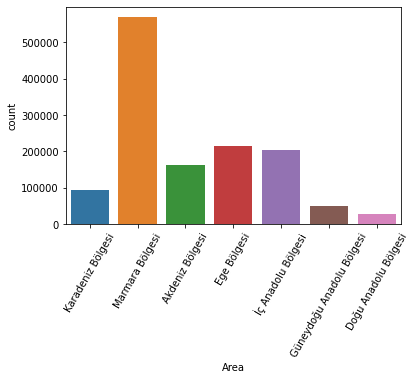

Number of samples According to Area 
Marmara Bölgesi              569284
Ege Bölgesi                  215709
İç Anadolu Bölgesi           203134
Akdeniz Bölgesi              163508
Karadeniz Bölgesi             93952
Güneydoğu Anadolu Bölgesi     50486
Doğu Anadolu Bölgesi          27438
Name: Area, dtype: int64


In [153]:
sns.countplot(x="Area", data=dataVis)
plt.xticks(rotation = 60)
plt.show()
print(f"Number of samples According to Area \n{dataVis['Area'].value_counts()}")

In [155]:
data_all_corr = dataVis.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_all_corr[data_all_corr['Feature 1'] == 'Litres']

,Feature 1,Feature 2,Correlation Coefficient
0,Litres,Litres,1.00
31,Litres,VehiclesNumber,0.56
46,Litres,FuelAmount,0.24
57,Litres,Population,0.09
68,Litres,FuelConsumption,0.04
70,Litres,MinumumWage,0.04
72,Litres,Year,0.04
79,Litres,Day,0.01
100,Litres,Month,-0.00
126,Litres,FuelConsumptionRate,-0.01


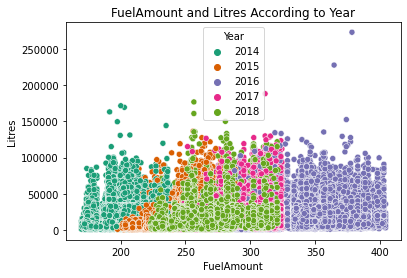

In [156]:
sns.scatterplot(x='FuelAmount', y='Litres', hue='Year', data=dataVis, palette = "Dark2")
plt.title('FuelAmount and Litres According to Year')
plt.show()

In [157]:
pd.crosstab(index=dataVis['Area'], columns=dataVis['Plant'])


Plant,T101,T102,T105,T107,T108,T110,T111,T112,T113,T120,T155,T248,T314,T317,T318,T327,T329
Area,,,,,,,,,,,,,,,,,
Akdeniz Bölgesi,0,8,10,10375,0,58362,94753,0,0,0,0,0,0,0,0,0,0
Doğu Anadolu Bölgesi,0,6,20,0,0,0,16804,0,1309,2671,0,4905,0,1511,0,212,0
Ege Bölgesi,7,6455,74,1472,0,7285,0,74593,0,0,638,0,0,0,125185,0,0
Güneydoğu Anadolu Bölgesi,0,2,0,0,0,0,48463,0,970,0,0,0,0,0,0,1051,0
Karadeniz Bölgesi,5,29664,4279,0,0,0,2,0,0,40784,2857,13259,0,3099,0,0,3
Marmara Bölgesi,132,161778,0,0,13513,0,0,12896,0,0,114926,0,245875,0,20164,0,0
İç Anadolu Bölgesi,0,13849,112922,36,0,312,56353,14,0,5979,2315,0,0,0,146,0,11208


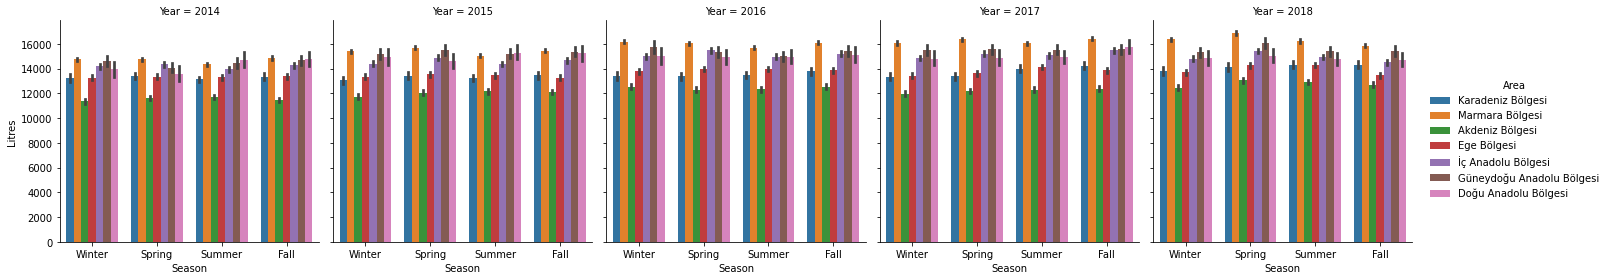

In [158]:
sns.catplot(x="Season", y="Litres",  hue="Area", col="Year",
            data=dataVis, kind="bar", height=4)
plt.show()

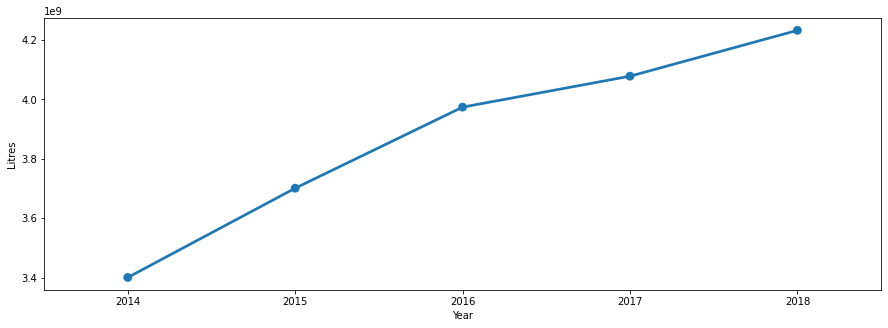

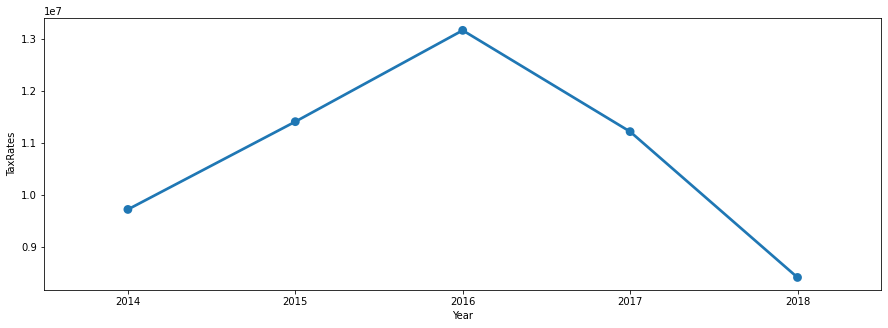

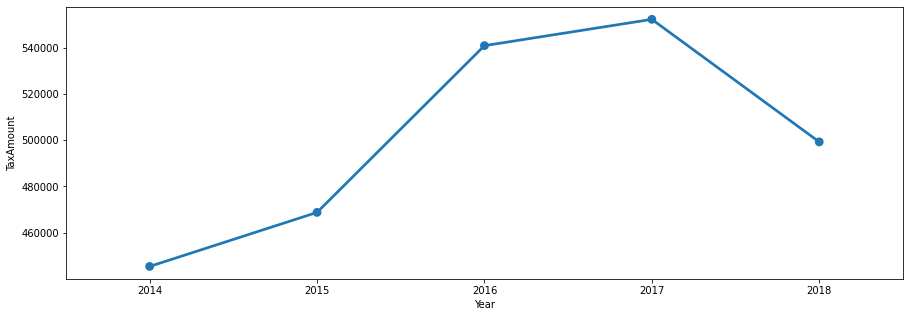

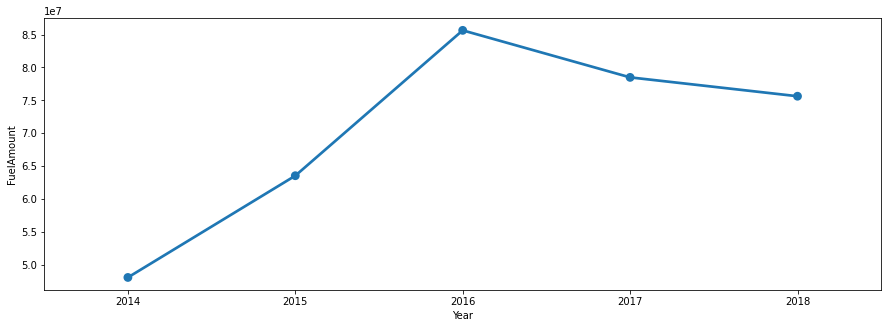

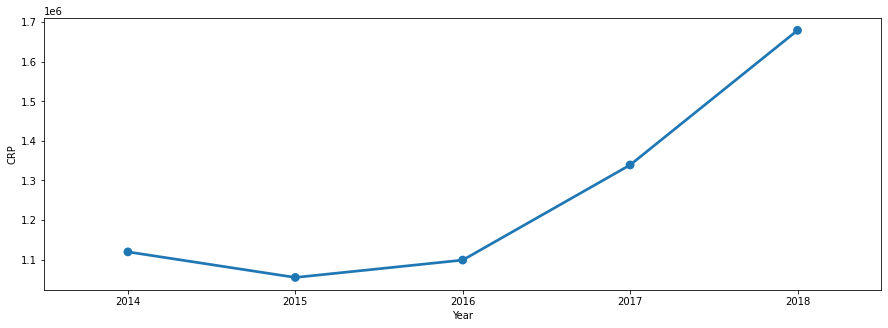

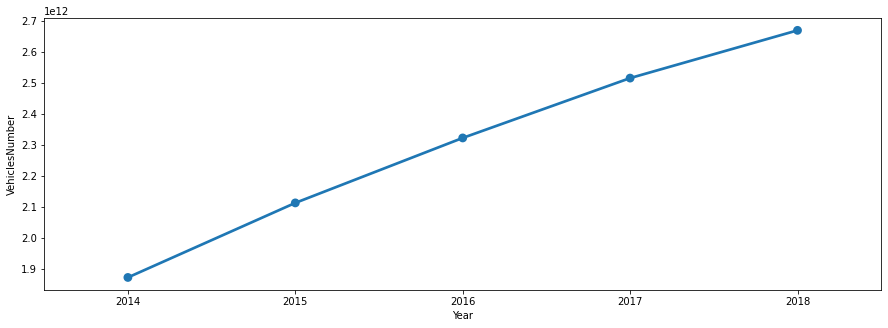

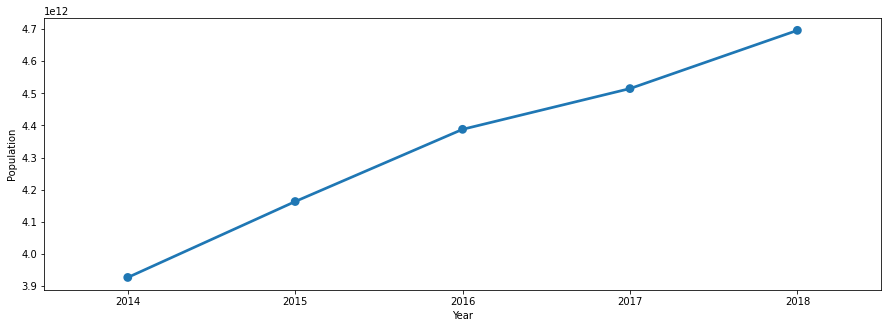

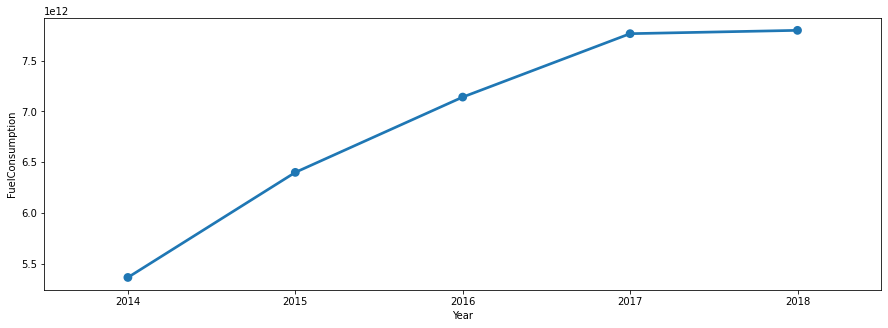

In [159]:
compounds = ["Litres", "TaxRates", "TaxAmount", "FuelAmount", "CRP", 
             "VehiclesNumber", "Population", "FuelConsumption"]
for i in compounds:    
    df = dataVis[[i, 'Year']].groupby(["Year"]).sum().reset_index().sort_values(by='Year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df)

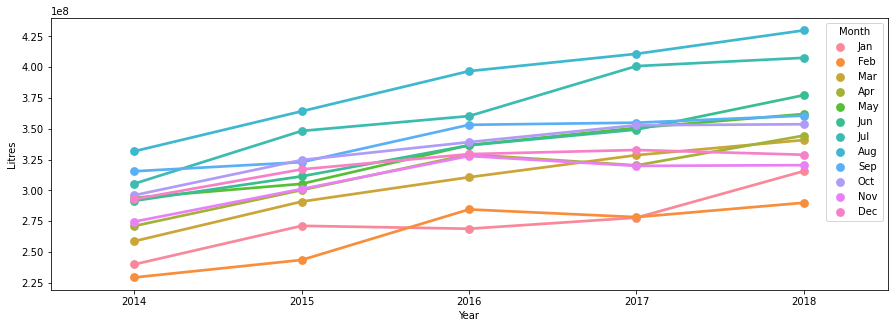

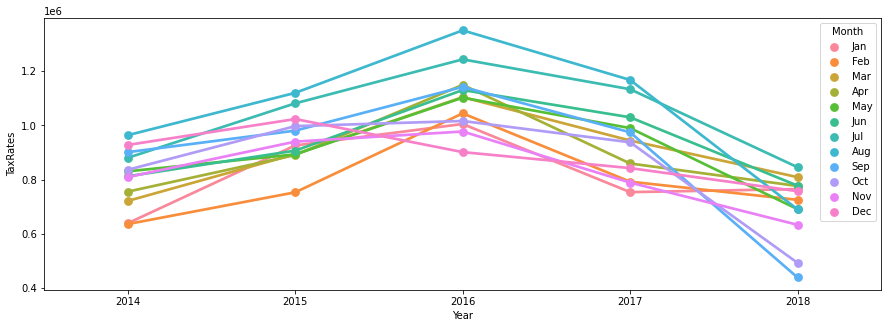

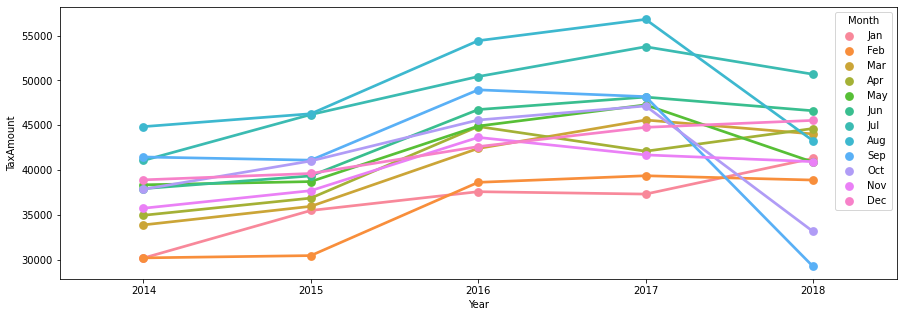

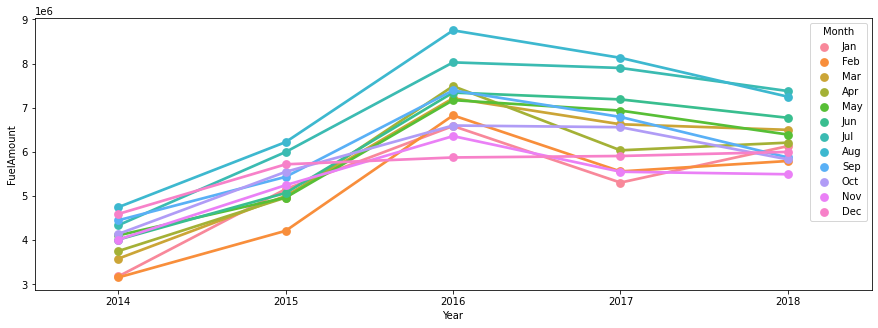

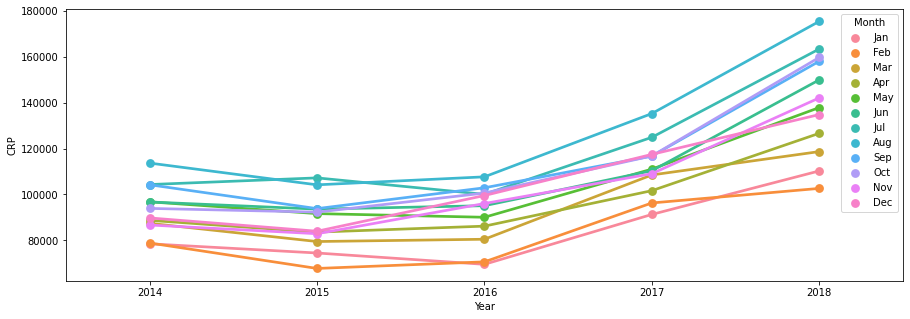

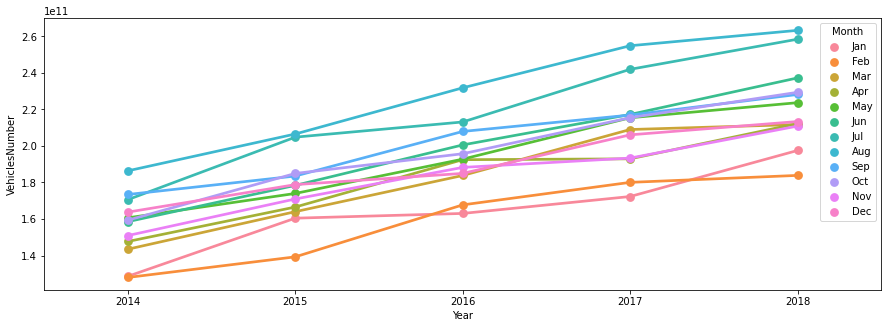

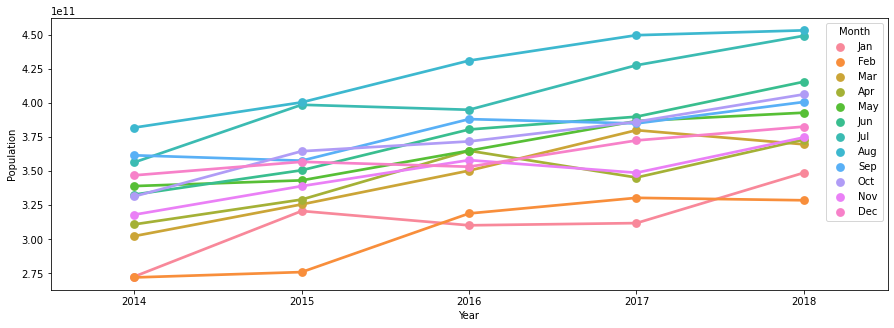

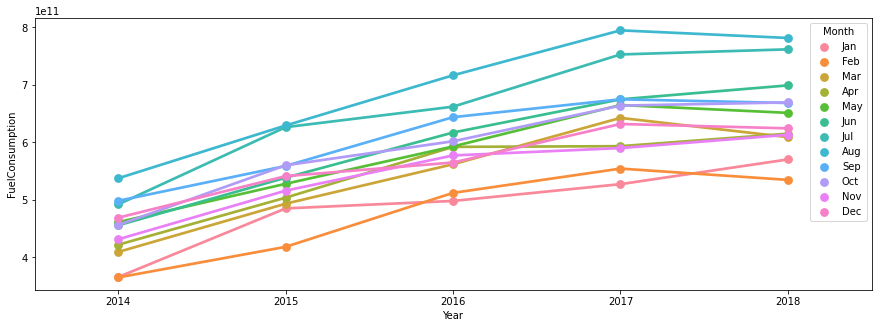

In [160]:
for i in compounds:
    temp_data = dataVis.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year',]].groupby(["Year",
                                                    "Month"]).sum().reset_index().sort_values(by=['Year',
                                                                                                   'Month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

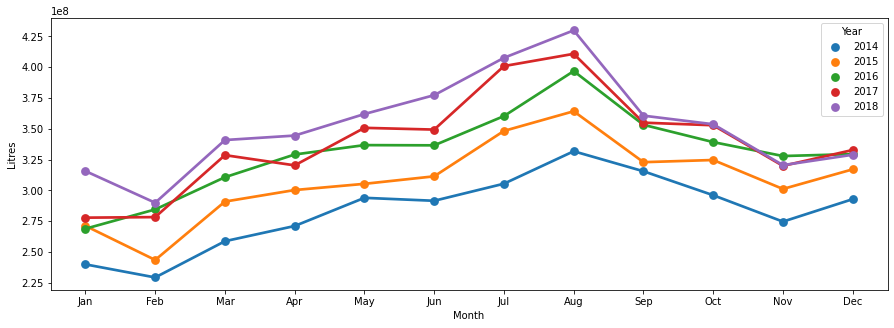

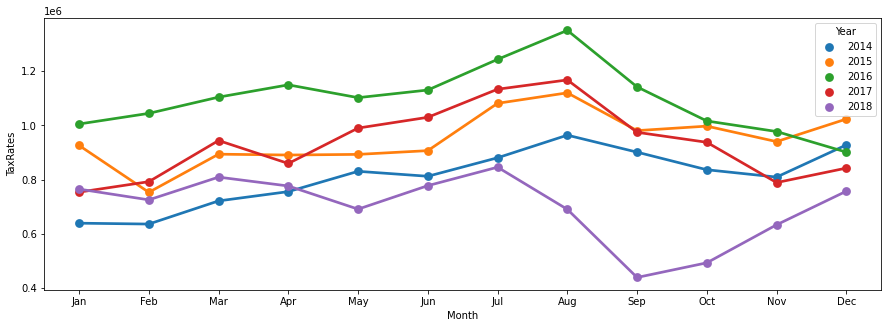

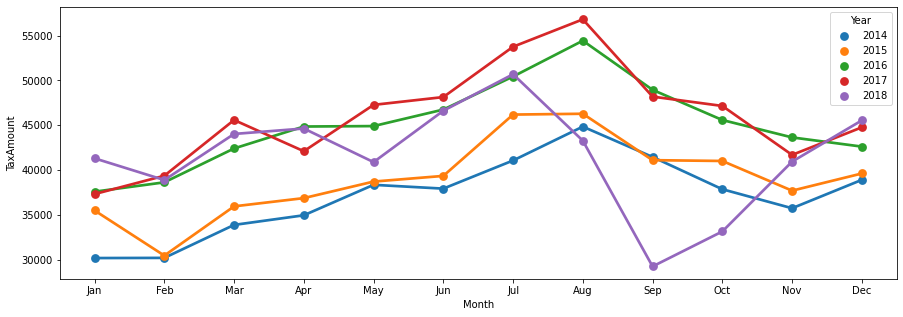

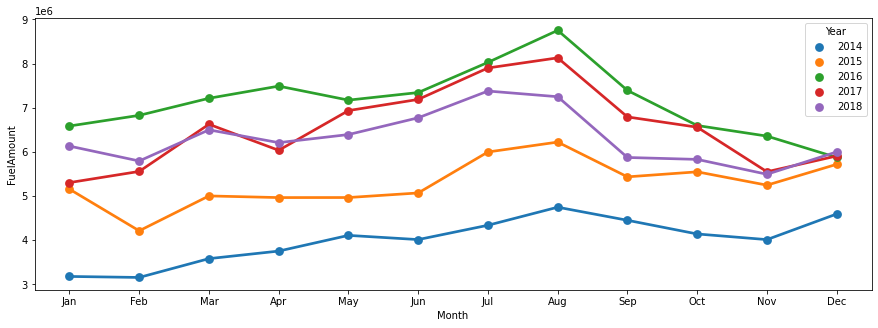

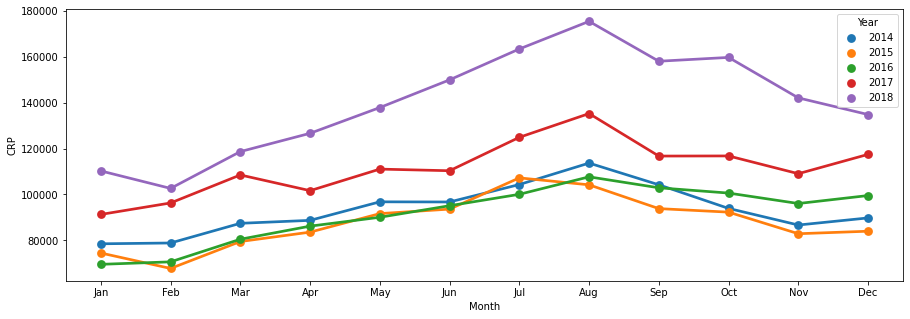

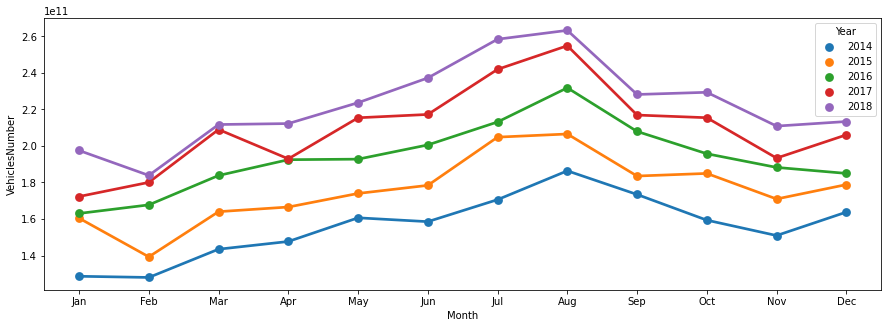

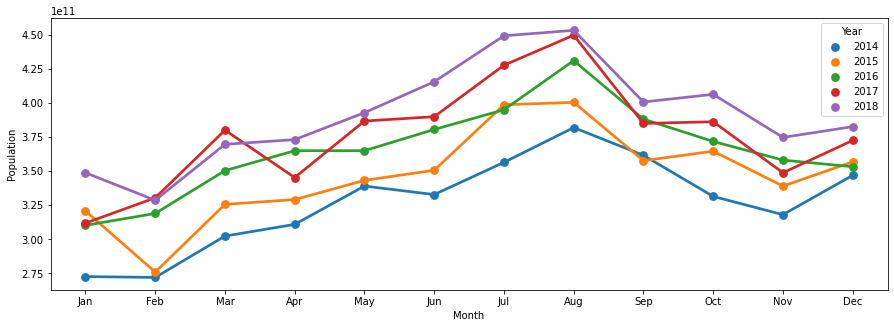

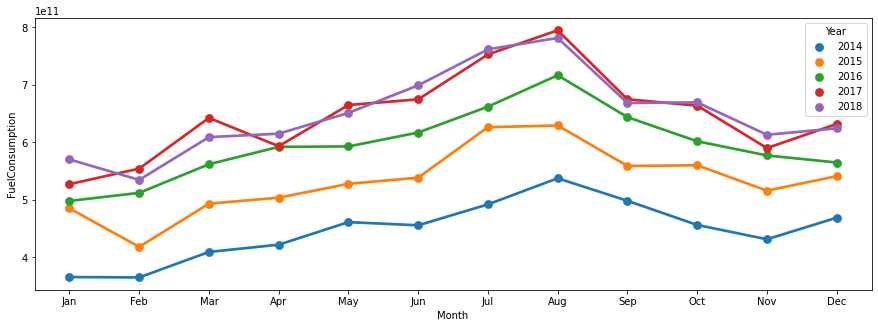

In [161]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = dataVis.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).sum().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
    df = df.iloc[df['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=df, hue="Year")

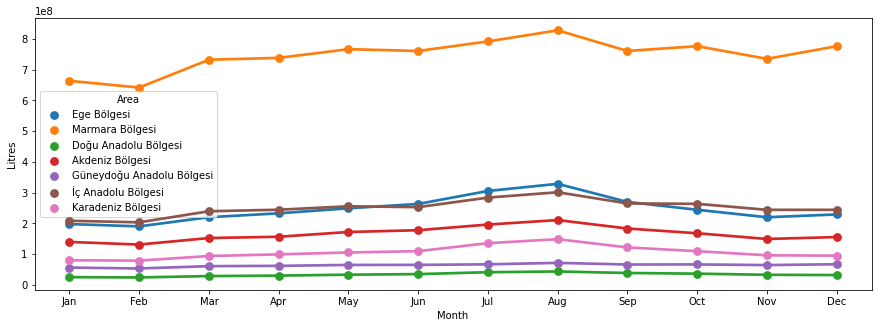

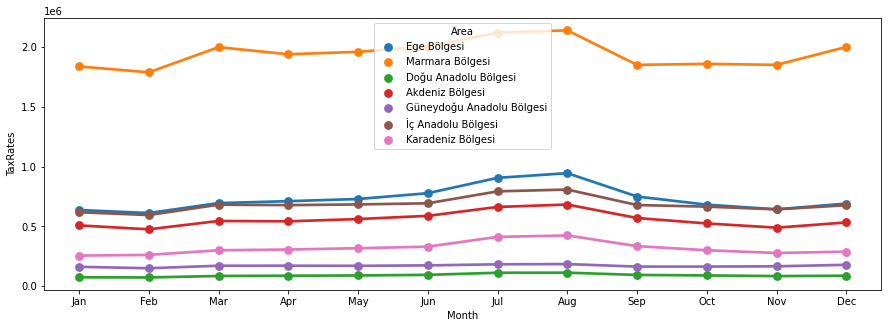

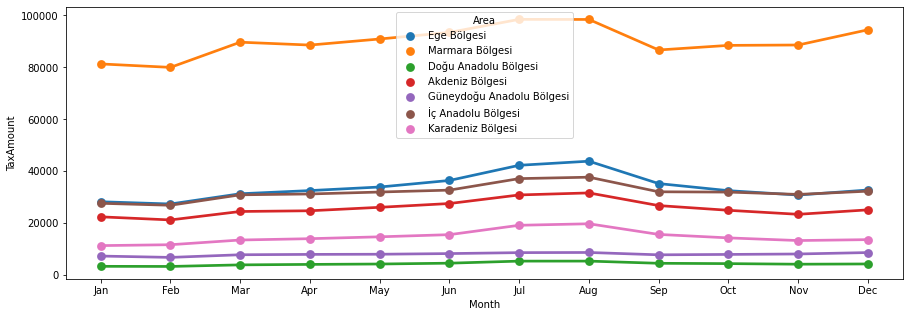

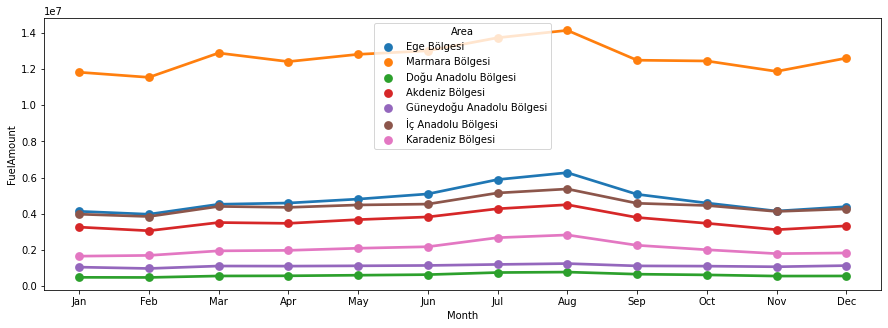

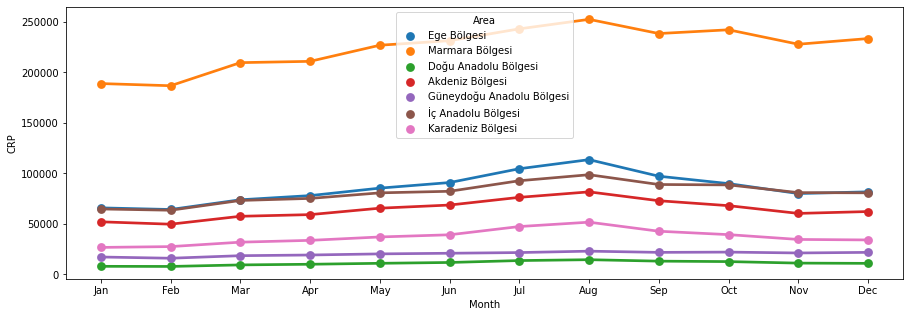

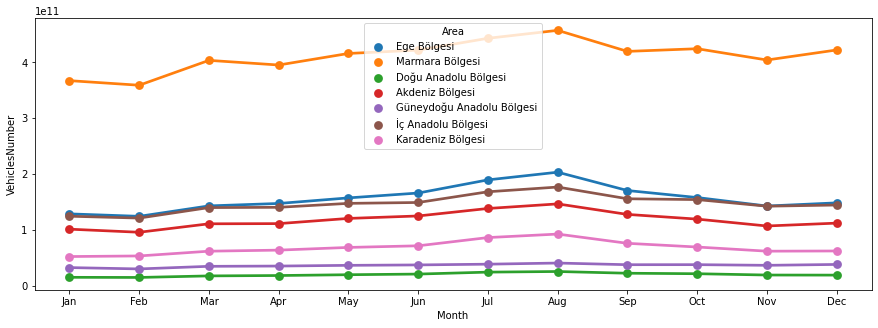

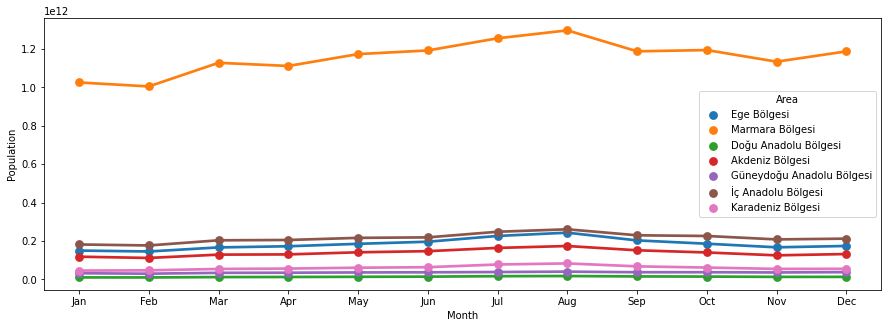

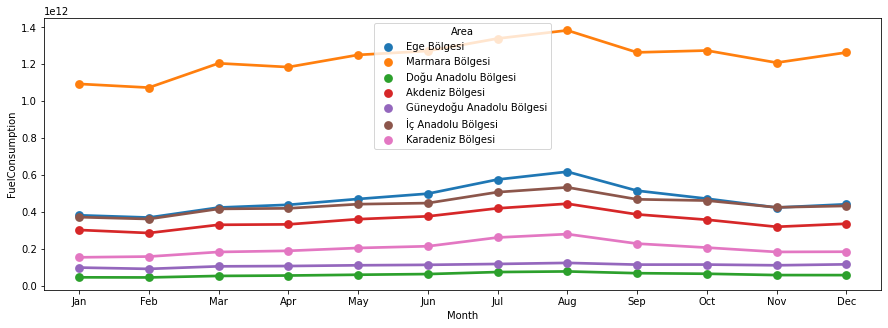

In [162]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = dataVis.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Area']].groupby(["Area",
                                                  "Month"]).sum().reset_index().sort_values(by=['Area', 
                                                                                                 'Month'], ascending=True)
    df = df.iloc[df['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=df, hue="Area")

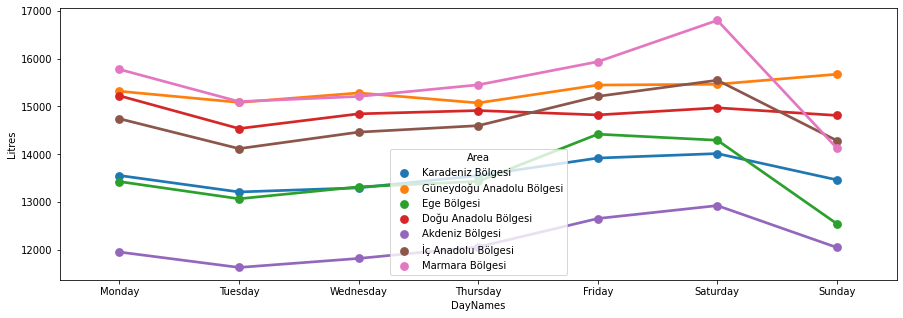

In [163]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

df = dataVis[["Litres", 'DayNames', 'Area']].groupby(["Area", "DayNames"]).mean().reset_index().sort_values(by=['Area', 'DayNames'], ascending=True)
df = df.iloc[df['DayNames'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='DayNames', y="Litres", data=df, hue="Area")
plt.show()

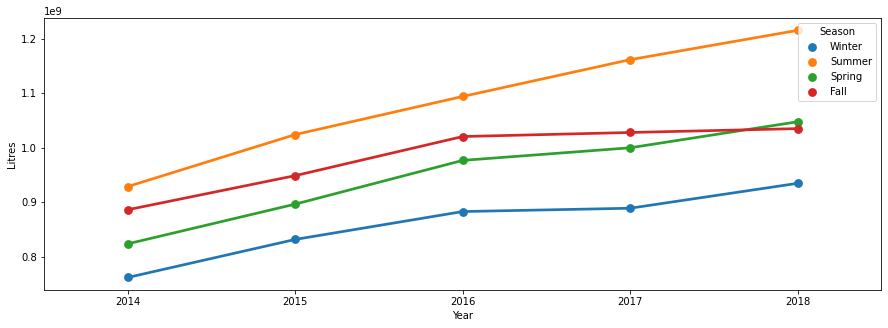

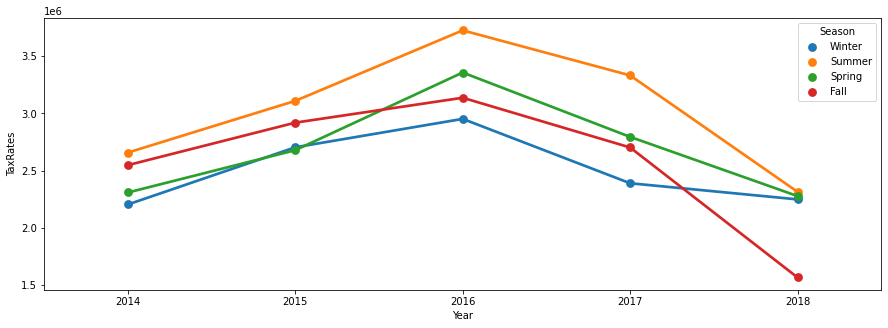

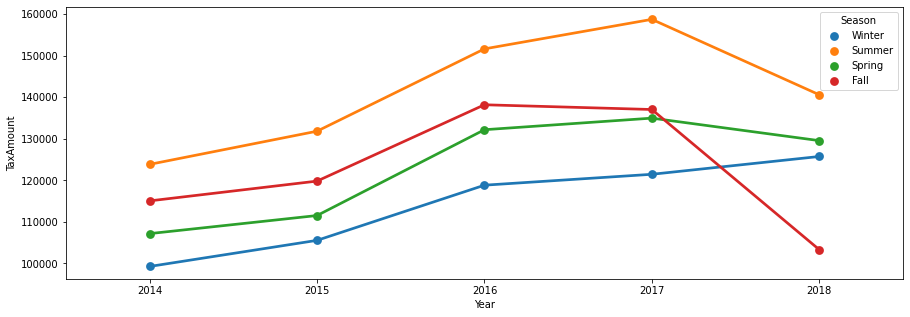

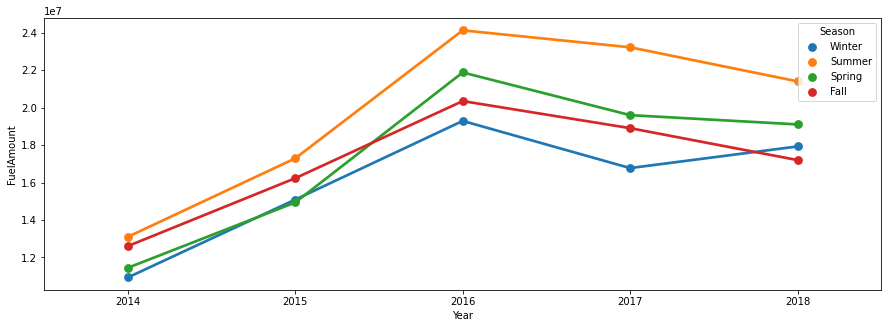

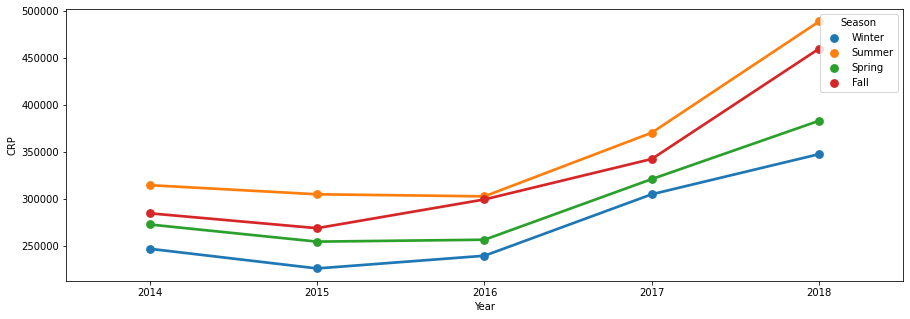

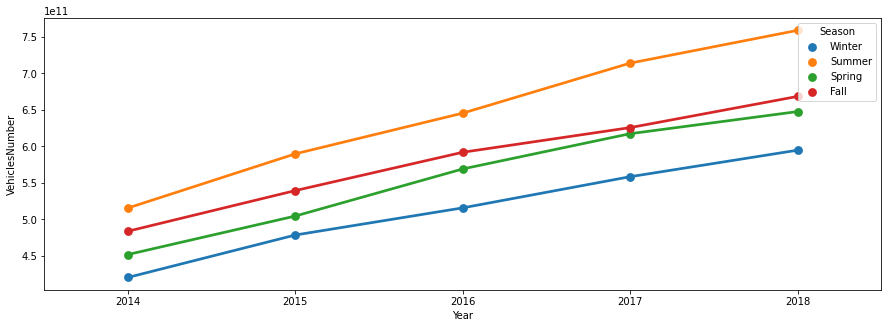

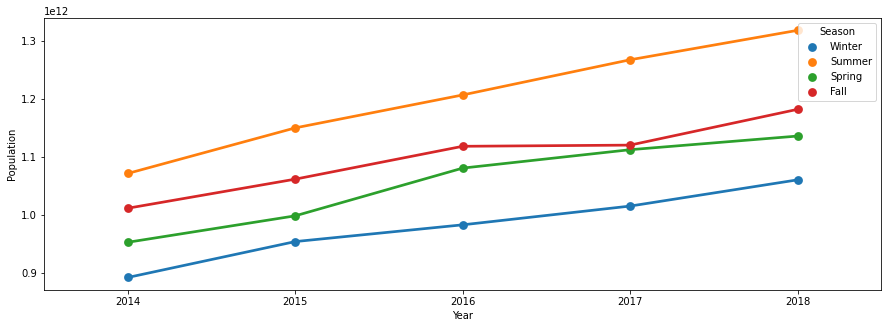

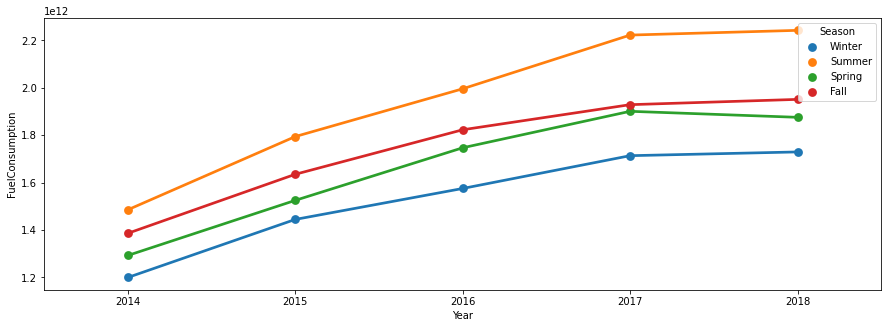

In [164]:
for i in compounds:  
    df = dataVis[[i, 'Year', 'Season']].groupby(["Year",
                                                 "Season"]).sum().reset_index().sort_values(by=['Season',
                                                                                                'Year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue="Season")
    plt.show()

In [165]:
deneme = data.copy()
deneme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Area                 1487732 non-null  object        
 1   CityCode             1487732 non-null  object        
 2   Customer             1487732 non-null  object        
 3   Date                 1487732 non-null  datetime64[ns]
 4   Litres               1379260 non-null  float64       
 5   Plant                1487732 non-null  object        
 6   Product              1487732 non-null  object        
 7   CRP                  1487732 non-null  float64       
 8   Year                 1487732 non-null  int64         
 9   Month                1487732 non-null  int64         
 10  Day                  1487732 non-null  int64         
 11  DayNames             1487732 non-null  object        
 12  Population           1487732 non-null  int64         
 1

In [166]:
# drop some columns and reduce memory
deneme.drop(["Date", "Year", "Day", "Customer", "DayNames"], axis=1, inplace=True)
deneme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487732 entries, 0 to 1487731
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Area                 1487732 non-null  object 
 1   CityCode             1487732 non-null  object 
 2   Litres               1379260 non-null  float64
 3   Plant                1487732 non-null  object 
 4   Product              1487732 non-null  object 
 5   CRP                  1487732 non-null  float64
 6   Month                1487732 non-null  int64  
 7   Population           1487732 non-null  int64  
 8   VehiclesNumber       1487732 non-null  int64  
 9   MinumumWage          1487732 non-null  float64
 10  FuelAmount           1487732 non-null  float64
 11  TaxAmount            1487732 non-null  float64
 12  TaxRates             1487732 non-null  float64
 13  FuelConsumption      1487732 non-null  int64  
 14  FuelConsumptionRate  1487732 non-null  float64
 15

In [167]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

categorical_variables = ["Product", "CityCode"]
for i in categorical_variables:
    print(f"For {i} column ")
    deneme[f"{i}"] = labelEncoder(deneme[f"{i}"])
    print("**********************************")
    
    
# use OneHotEncoder for other categorical features
deneme = pd.get_dummies(deneme, columns=["Area", "Plant", "Season"])

deneme.head(3)

For Product column 
Encoding Approach:
Benzin  ==>  0
Motorin  ==>  1
**********************************
For CityCode column 
Encoding Approach:
883  ==>  61
966  ==>  72
589  ==>  36
523  ==>  29
941  ==>  68
915  ==>  66
812  ==>  56
936  ==>  67
647  ==>  40
466  ==>  24
835  ==>  59
949  ==>  70
789  ==>  53
574  ==>  34
434  ==>  23
834  ==>  58
288  ==>  13
913  ==>  65
667  ==>  44
367  ==>  18
126  ==>  2
987  ==>  74
474  ==>  25
818  ==>  57
884  ==>  62
570  ==>  33
354  ==>  17
810  ==>  55
634  ==>  39
990  ==>  75
565  ==>  32
256  ==>  11
429  ==>  21
575  ==>  35
976  ==>  73
774  ==>  52
321  ==>  16
320  ==>  15
676  ==>  46
902  ==>  64
125  ==>  1
682  ==>  47
722  ==>  49
621  ==>  38
203  ==>  8
476  ==>  27
172  ==>  4
674  ==>  45
194  ==>  6
532  ==>  31
650  ==>  41
658  ==>  43
287  ==>  12
757  ==>  51
693  ==>  48
793  ==>  54
750  ==>  50
218  ==>  9
530  ==>  30
893  ==>  63
865  ==>  60
475  ==>  26
401  ==>  19
174  ==>  5
611  ==>  37
657  ==>  42
947 

,CityCode,Litres,Product,CRP,Month,Population,VehiclesNumber,MinumumWage,FuelAmount,TaxAmount,TaxRates,FuelConsumption,FuelConsumptionRate,Area_Akdeniz Bölgesi,Area_Doğu Anadolu Bölgesi,Area_Ege Bölgesi,Area_Güneydoğu Anadolu Bölgesi,Area_Karadeniz Bölgesi,Area_Marmara Bölgesi,Area_İç Anadolu Bölgesi,Plant_T101,Plant_T102,Plant_T105,Plant_T107,Plant_T108,Plant_T110,Plant_T111,Plant_T112,Plant_T113,Plant_T120,Plant_T155,Plant_T248,Plant_T314,Plant_T317,Plant_T318,Plant_T327,Plant_T329,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,61,0.00,0,4.98,1,7597894,5788505,891.00,178.92,2.18,43.70,21892670,3.62,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,61,0.00,0,4.98,1,7597894,5788505,891.00,178.92,2.18,43.70,21892670,3.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,61,0.00,1,4.58,1,7597894,8782462,891.00,194.54,1.59,34.81,21892670,3.62,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [168]:
# we can check the correlation between features
data_all_corr = deneme.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_all_corr[data_all_corr['Feature 1'] == 'Litres']

,Feature 1,Feature 2,Correlation Coefficient
20,Litres,Litres,1.00
70,Litres,Product,0.55
71,Litres,VehiclesNumber,0.53
104,Litres,FuelAmount,0.24
159,Litres,Population,0.10
166,Litres,Area_Marmara Bölgesi,0.10
167,Litres,Plant_T314,0.10
218,Litres,FuelConsumption,0.05
224,Litres,MinumumWage,0.05
236,Litres,Plant_T102,0.04


In [169]:
train, test = divide_df(deneme)
train = train.loc[(train["Litres"] > 0)]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323511 entries, 4 to 1379259
Data columns (total 41 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   CityCode                        1323511 non-null  int64  
 1   Litres                          1323511 non-null  float64
 2   Product                         1323511 non-null  int64  
 3   CRP                             1323511 non-null  float64
 4   Month                           1323511 non-null  int64  
 5   Population                      1323511 non-null  int64  
 6   VehiclesNumber                  1323511 non-null  int64  
 7   MinumumWage                     1323511 non-null  float64
 8   FuelAmount                      1323511 non-null  float64
 9   TaxAmount                       1323511 non-null  float64
 10  TaxRates                        1323511 non-null  float64
 11  FuelConsumption                 1323511 non-null  int64  
 12  

In [170]:
# we can check the correlation between features
data_all_corr = train.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_all_corr[data_all_corr['Feature 1'] == 'Litres']

,Feature 1,Feature 2,Correlation Coefficient
20,Litres,Litres,1.00
61,Litres,Product,0.58
67,Litres,VehiclesNumber,0.56
107,Litres,FuelAmount,0.24
173,Litres,Population,0.09
175,Litres,Area_Marmara Bölgesi,0.09
180,Litres,Plant_T314,0.08
239,Litres,Plant_T102,0.04
244,Litres,FuelConsumption,0.04
246,Litres,MinumumWage,0.04


In [171]:
# create input and output
X_train = train.drop('Litres', axis = 1)
y_train = train['Litres']
X_test = test.drop('Litres', axis = 1)

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor()
clf = model.fit(X_train, y_train)
pred = clf.predict(X_test)

In [173]:
sub = pd.DataFrame()
sub['index'] = index
sub['Litres'] = pred
sub["Litres"]
sub.to_csv('submission.csv', index=False)